In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("combined_excel.csv")

In [3]:
df

,PostID,PostURL,Post Title,PostContent,PostAuthor,PostUpvotes,PostTime,PostComments,CommentAuthor,CommentUpvotes,CommentTime,CommentReply,ReplyAuthor,ReplyUpvotes,ReplyTime
0,7jrba2,https://www.reddit.com/r/crypto/comments/7jrba...,Crypto is not cryptocurrency,NaN,davidw_-,611,12/14/2017 20:38,i don't think that a pinned post helps the sit...,pint,56,12/14/2017 21:37,Most people doesn't even seem to bother readin...,Natanael_L,24,12/14/2017 21:57
1,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,ELI5?,jabes52,1352,11/16/2016 0:53,Wikileaks told its readers they would publish ...,438498967,2991,11/16/2016 2:49
2,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,A few of us attentive sleuths knew something w...,Exec99,7122,11/15/2016 20:17,I've been following this theory in wikileaks/c...,tudda,1484,11/15/2016 20:37
3,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,[deleted],Exec99,7122,11/15/2016 20:17,I've been following this theory in wikileaks/c...,tudda,1484,11/15/2016 20:37
4,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,"If true, what would this mean?",manueslapera,417,11/15/2016 8:07,It means the contents of the file changed from...,DoWhile,795,11/15/2016 10:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36883,7yd9d8,https://www.reddit.com/r/Crypto_Currency_News/...,Just kidding that's US Dollar.,NaN,samcrypto1004,168,2/18/2018 17:10,> Dude relax! I didn't mean to give you asswhi...,None,1,2/18/2018 19:19,Imagine if in 1913 $1 could buy you 100 loaves...,FriskyGrub,7,2/18/2018 19:28
36884,7yd9d8,https://www.reddit.com/r/Crypto_Currency_News/...,Just kidding that's US Dollar.,NaN,samcrypto1004,168,2/18/2018 17:10,"Wow, you are tons of fun. Seriously, you are a...",None,1,2/18/2018 19:19,Imagine if in 1913 $1 could buy you 100 loaves...,FriskyGrub,7,2/18/2018 19:28
36885,7yd9d8,https://www.reddit.com/r/Crypto_Currency_News/...,Just kidding that's US Dollar.,NaN,samcrypto1004,168,2/18/2018 17:10,Who said I was pissed? Just pointing out that ...,None,1,2/18/2018 19:19,Imagine if in 1913 $1 could buy you 100 loaves...,FriskyGrub,7,2/18/2018 19:28
36886,7yd9d8,https://www.reddit.com/r/Crypto_Currency_News/...,Just kidding that's US Dollar.,NaN,samcrypto1004,168,2/18/2018 17:10,"Wow, I've never been so sick about a reddit co...",None,1,2/18/2018 19:19,Imagine if in 1913 $1 could buy you 100 loaves...,FriskyGrub,7,2/18/2018 19:28


In [7]:
comments_df = pd.DataFrame(df["PostComments"])
comments_df = comments_df[comments_df.PostComments != "[deleted]"] # removing "deleted" and "removed
comments_df = comments_df[comments_df.PostComments != "[removed]"]
comments_df = comments_df.reset_index(drop=True)

characters_to_replace = ['&', '#', ';', '{', '}'] # removing characters that are not allowed
replacement_char = ':'
for char in characters_to_replace:
    comments_df['PostComments'] = comments_df['PostComments'].str.replace(char, replacement_char)

comments_df.head()

/var/folders/ht/vj5_hz494059tyzm_9_1x92c0000gn/T/ipykernel_78761/757486764.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  comments_df['PostComments'] = comments_df['PostComments'].str.replace(char, replacement_char)


,PostComments
0,i don't think that a pinned post helps the sit...
1,ELI5?
2,A few of us attentive sleuths knew something w...
3,"If true, what would this mean?"
4,I think we should be pressuring wikileaks to a...


In [9]:
import requests

In [ ]:
# using SenticNet API for sarcasm detection
LANG = 'en'
APIKEY = 'k0yKdLVY54rfozubLki'
APIURL = 'https://sentic.net/api/' + LANG + '/' + APIKEY + '.py?text='

sarcasm_arr = []

for row in comments_df.itertuples():
    sarcasm_score = str(requests.get(APIURL + str(row.PostComments)).content)[2:-3]
    print(row.Index, sarcasm_score)
    sarcasm_arr.append(sarcasm_score)

# comments_df["Sarcasm"] = sarcasm_arr

In [ ]:
# changing string responses to score
num_arr = []
for result in sarcasm_arr:
    if "No sarcasm detected" in str(result): or  #"DOCTYPE" in str(result) 
        num_arr.append(0)
    else:
        pos1 = (str(result)).find('(')
        pos2 = (str(result)).find('%')
        num_str = result[pos1+1:pos2]
        val = float(num_str) if num_str != "na" else 0
        num_arr.append(round(val/100, 2))

In [ ]:
comments_df["SarcasmScore"] = num_arr

In [59]:
comments_df

,PostComments,SarcasmScore
0,i don't think that a pinned post helps the sit...,0.0
1,ELI5?,0.0
2,A few of us attentive sleuths knew something w...,0.0
3,"If true, what would this mean?",0.0
4,I think we should be pressuring wikileaks to a...,0.0
...,...,...
34685,> Dude relax! I didn't mean to give you asswhi...,0.0
34686,"Wow, you are tons of fun. Seriously, you are a...",0.0
34687,Who said I was pissed? Just pointing out that ...,0.0
34688,"Wow, I've never been so sick about a reddit co...",0.0


In [61]:
import matplotlib.pyplot as plt

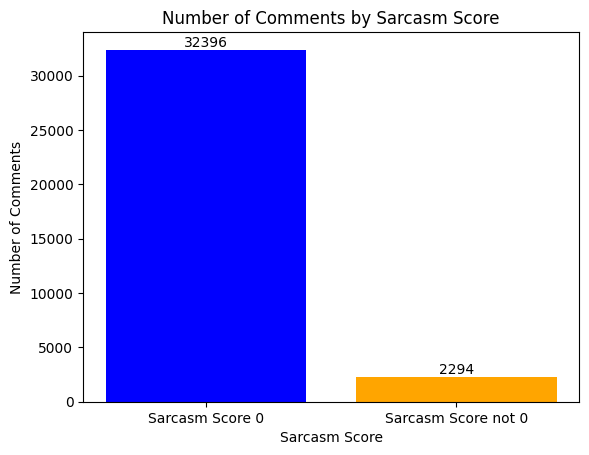

In [72]:
sarcasm_zero = comments_df[comments_df['SarcasmScore'] == 0.0]
sarcasm_not_zero = comments_df[comments_df['SarcasmScore'] != 0.0]

count_zero = len(sarcasm_zero)
count_not_zero = len(sarcasm_not_zero)

labels = ['Sarcasm Score 0', 'Sarcasm Score not 0']
counts = [count_zero, count_not_zero]

bars = plt.bar(labels, counts, color=['blue', 'orange'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Sarcasm Score')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by Sarcasm Score')
plt.show()

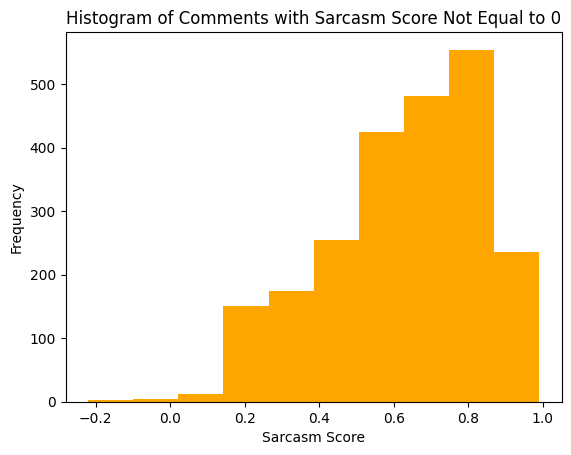

In [65]:
plt.hist(sarcasm_not_zero['SarcasmScore'], bins=10, color='orange')
plt.xlabel('Sarcasm Score')
plt.ylabel('Frequency')
plt.title('Histogram of Comments with Sarcasm Score Not Equal to 0')
plt.show()

In [68]:
comments_df.to_csv("sarcasm.csv", index=False)

In [98]:
ml_df = df.drop_duplicates().join(comments_df.drop_duplicates().set_index('PostComments'), on='PostComments')
ml_df

,PostID,PostURL,Post Title,PostContent,PostAuthor,PostUpvotes,PostTime,PostComments,CommentAuthor,CommentUpvotes,CommentTime,CommentReply,ReplyAuthor,ReplyUpvotes,ReplyTime,SarcasmScore
0,7jrba2,https://www.reddit.com/r/crypto/comments/7jrba...,Crypto is not cryptocurrency,NaN,davidw_-,611,12/14/2017 20:38,i don't think that a pinned post helps the sit...,pint,56,12/14/2017 21:37,Most people doesn't even seem to bother readin...,Natanael_L,24,12/14/2017 21:57,0.0
1,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,ELI5?,jabes52,1352,11/16/2016 0:53,Wikileaks told its readers they would publish ...,438498967,2991,11/16/2016 2:49,0.0
2,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,A few of us attentive sleuths knew something w...,Exec99,7122,11/15/2016 20:17,I've been following this theory in wikileaks/c...,tudda,1484,11/15/2016 20:37,0.0
3,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,[deleted],Exec99,7122,11/15/2016 20:17,I've been following this theory in wikileaks/c...,tudda,1484,11/15/2016 20:37,NaN
4,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,"If true, what would this mean?",manueslapera,417,11/15/2016 8:07,It means the contents of the file changed from...,DoWhile,795,11/15/2016 10:58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36883,7yd9d8,https://www.reddit.com/r/Crypto_Currency_News/...,Just kidding that's US Dollar.,NaN,samcrypto1004,168,2/18/2018 17:10,> Dude relax! I didn't mean to give you asswhi...,None,1,2/18/2018 19:19,Imagine if in 1913 $1 could buy you 100 loaves...,FriskyGrub,7,2/18/2018 19:28,NaN
36884,7yd9d8,https://www.reddit.com/r/Crypto_Currency_News/...,Just kidding that's US Dollar.,NaN,samcrypto1004,168,2/18/2018 17:10,"Wow, you are tons of fun. Seriously, you are a...",None,1,2/18/2018 19:19,Imagine if in 1913 $1 could buy you 100 loaves...,FriskyGrub,7,2/18/2018 19:28,0.0
36885,7yd9d8,https://www.reddit.com/r/Crypto_Currency_News/...,Just kidding that's US Dollar.,NaN,samcrypto1004,168,2/18/2018 17:10,Who said I was pissed? Just pointing out that ...,None,1,2/18/2018 19:19,Imagine if in 1913 $1 could buy you 100 loaves...,FriskyGrub,7,2/18/2018 19:28,0.0
36886,7yd9d8,https://www.reddit.com/r/Crypto_Currency_News/...,Just kidding that's US Dollar.,NaN,samcrypto1004,168,2/18/2018 17:10,"Wow, I've never been so sick about a reddit co...",None,1,2/18/2018 19:19,Imagine if in 1913 $1 could buy you 100 loaves...,FriskyGrub,7,2/18/2018 19:28,0.0


In [161]:
labels = pd.read_csv('sentiment_analysed.csv')

In [162]:
ml_df2 = pd.concat([ml_df, labels['sentiment']], axis=1)

In [163]:
import nltk

In [164]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [165]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanya.banerjee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tanya.banerjee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tanya.banerjee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tanya.banerjee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [166]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [167]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    words = [word for word in tokens if word.isalpha()]
    words = [word for word in words if not word in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

ml_df2['PostComments'] = ml_df2['PostComments'].astype(str)

In [168]:
ml_df2['ProcessedComments'] = ml_df2['PostComments'].apply(preprocess_text)

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [170]:
ml_df3 = ml_df2.dropna()

In [171]:
X = ml_df3[['ProcessedComments', 'SarcasmScore']]
y = ml_df3['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values.flatten()

column_transformer = ColumnTransformer([
    ('text', CountVectorizer(), 'ProcessedComments'),
    ('numeric', StandardScaler(), ['SarcasmScore'])
])

# Transform the training data
X_train_transformed = column_transformer.fit_transform(X_train)

# Initialize the SVC classifier
svc = SVC(kernel='linear', probability=True)

# Fit the classifier to the transformed training data
svc.fit(X_train_transformed, y_train)

# Transform the test data
X_test_transformed = column_transformer.transform(X_test)

# Predict on the transformed test data
y_pred = svc.predict(X_test_transformed)

In [172]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

Accuracy: 0.8215271389144434
Precision: 0.82163605939907
Recall: 0.8215271389144434
F1 Score: 0.8206865751686837


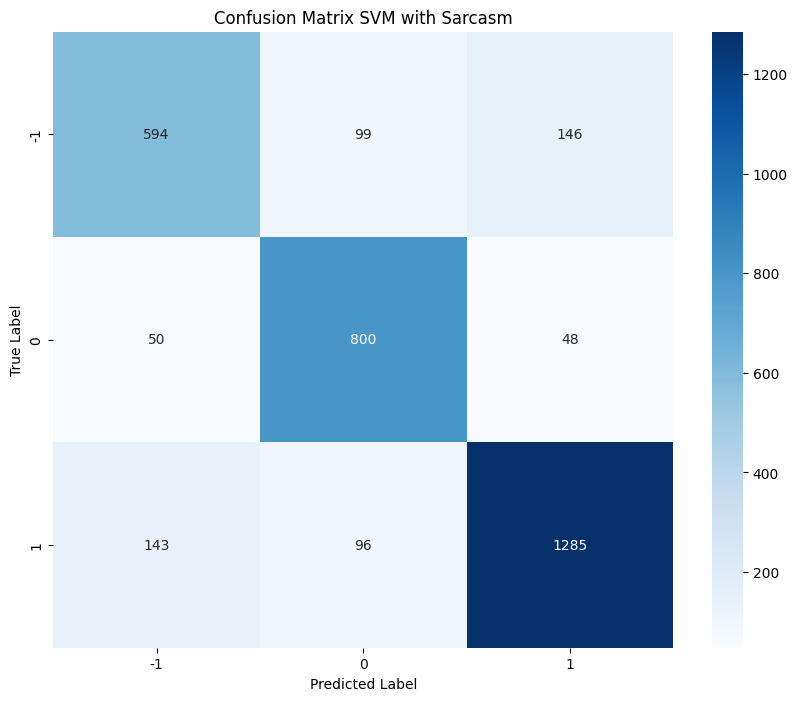

In [173]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_)
plt.title('Confusion Matrix SVM with Sarcasm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()